# Estimating the anomalous magnetic field amplitude

This notebook estimates, using the equivalent layer technique, the AMF from a total field anomaly produced by a complex source using an airborne survey with topography.

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

In [116]:
import sys
sys.path.insert(0, '../../code')

import mag_sphere_functions as mfun

# Input

### Observation points and observed data

In [117]:
model_dir = 'data/model_real_obs_pts.pickle'
data_dir = 'data/real_obs_pts/data.pickle'

In [118]:
with open(model_dir) as w:
        model = pickle.load(w)

In [119]:
with open(data_dir) as w:
        data = pickle.load(w)

In [120]:
# observed data and observation points
dobs = data['tfa_obs']
xp = data['grid'][0]
yp = data['grid'][1]
zp = data['grid'][2]
N = data['grid'][3]

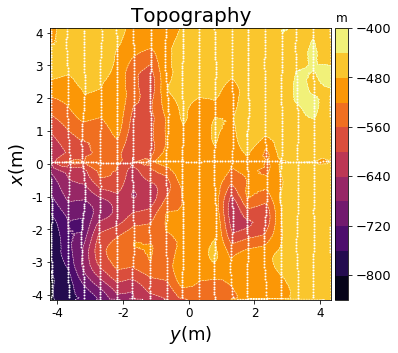

In [121]:
plt.figure(figsize=(6,5))
plt.title('Topography', fontsize=20)
plt.tricontour(yp, xp, zp, 10, linewidths=0.5, colors='w')
plt.tricontourf(yp, xp, zp, 10, cmap='inferno').ax.tick_params(labelsize=12)
plt.plot(yp, xp, 'wo', markersize=1.)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('m')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
#plt.savefig(mypath+'topography.png', dpi=300, bb_box='tight')
plt.show()
#img(filename=mypath+'complex_tfa_residual.png', width=1600, height=400)

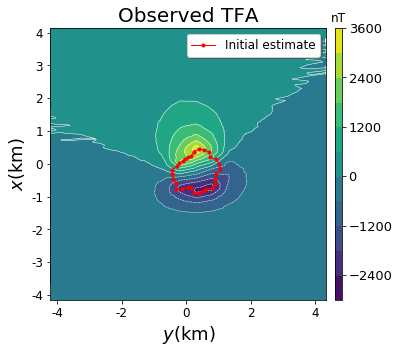

In [424]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontour(yp, xp, dobs, 10, linewidths=0.5, colors='w')
plt.tricontourf(yp, xp, dobs, 10, cmap='viridis').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(model['prisms'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_pred_data_true_inital.png', width=1000, height=1200)

In [425]:
model['inc']

-50.0

### Parameters for the equivalent layer

In [426]:
R = (3./(4.*np.pi))**(1./3)
h = np.zeros(N)                    # layer depth

### Estimating the equivalent layer

In [427]:
A = mfun.sm_tf_sphere(xp, yp, zp, xp, yp, h ,
        data['main_field'][0],data['main_field'][1],
                     model['inc'], model['dec'])

In [428]:
I = np.identity(xp.size)

In [429]:
f0 = np.trace(np.dot(A.T, A))/xp.size

In [430]:
u0 = 0.0001

In [431]:
vp = np.linalg.solve(np.dot(A.T,A) + u0*f0*I,np.dot(A.T,dobs))

In [432]:
tf_layer_fd = np.dot(A,vp)

### Comparison with TFA function

In [433]:
np.allclose(dobs,tf_layer_fd)

False

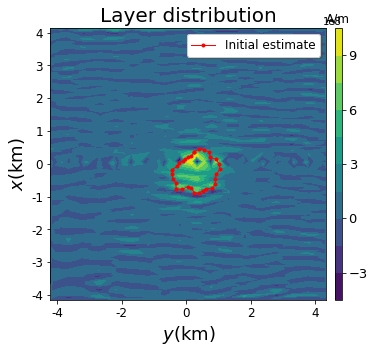

In [434]:
plt.figure(figsize=(6,5))
plt.title('Layer distribution', fontsize=20)
#plt.tricontour(yp, xp, vp, 10, linewidths=0.5, colors='w')
plt.tricontourf(yp, xp, vp, 10, cmap='viridis').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(model['prisms'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_pred_data_true_inital.png', width=1000, height=1200)

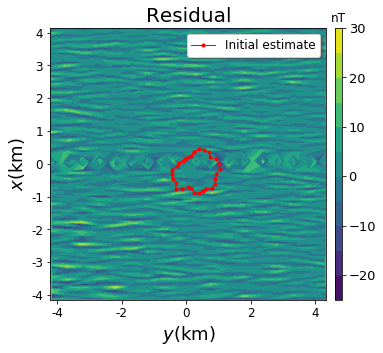

In [443]:
plt.figure(figsize=(6,5))
plt.title('Residual', fontsize=20)
#plt.tricontour(yp, xp, dobs - tf_layer_fd, 10, linewidths=0.5, colors='w')
plt.tricontourf(yp, xp, dobs - tf_layer_fd, 10, cmap='viridis').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
#source = mpl.polygon(kimberlite_model['prisms'][0], '.-k', xy2ne=True)
estimate = mpl.polygon(model['prisms'][0], '.-r', xy2ne=True)
#source.set_label('Outcropping polygon')
estimate.set_label('Initial estimate')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_pred_data_true_inital.png', width=1000, height=1200)

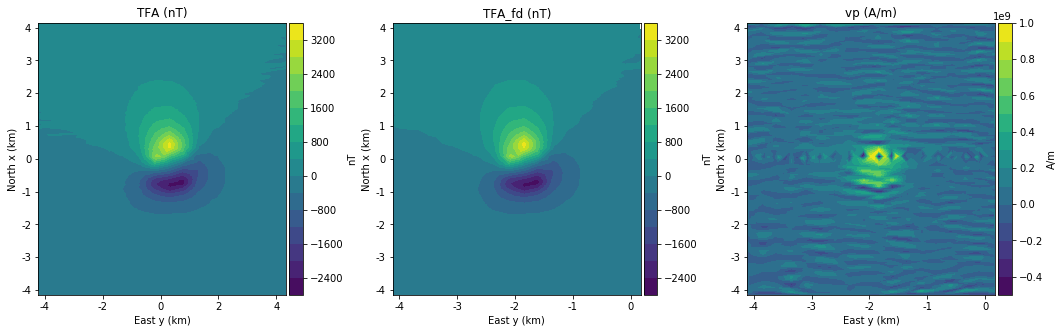

In [444]:
mpl.figure(figsize=(18,5))
mpl.subplot(1,3,1)
mpl.title("TFA (nT)")
mpl.tricontourf(yp, xp, dobs, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar(pad=0.01, aspect=20, shrink=1).set_label('nT')
mpl.m2km()
mpl.subplot(1,3,2)
mpl.title("TFA_fd (nT)")
mpl.tricontourf(yp, xp, tf_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.m2km()
mpl.colorbar(pad=0.01, aspect=20, shrink=1).set_label('nT')
mpl.subplot(1,3,3)
mpl.title("vp (A/m)")
mpl.tricontourf(yp, xp, vp, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.m2km()
mpl.colorbar(pad=0.01, aspect=20, shrink=1).set_label('A/m')
mpl.show()

In [445]:
A_bx = mfun.sm_bx_sphere(xp, yp, zp, xp, yp, h,
                        model['inc'], model['dec'])

Bx_layer_fd = np.dot(A_bx,vp)

In [446]:
np.allclose(data['bx'],Bx_layer_fd)

False

In [447]:
A_by = mfun.sm_by_sphere(xp, yp, zp, xp, yp, h,
                        model['inc'], model['dec'])

By_layer_fd = np.dot(A_by,vp)

In [448]:
np.allclose(data['by'],By_layer_fd)

False

In [449]:
A_bz = mfun.sm_bz_sphere(xp, yp, zp, xp, yp, h,
                        model['inc'], model['dec'])

Bz_layer_fd = np.dot(A_bz,vp)

In [450]:
np.allclose(data['bz'],Bz_layer_fd)

False

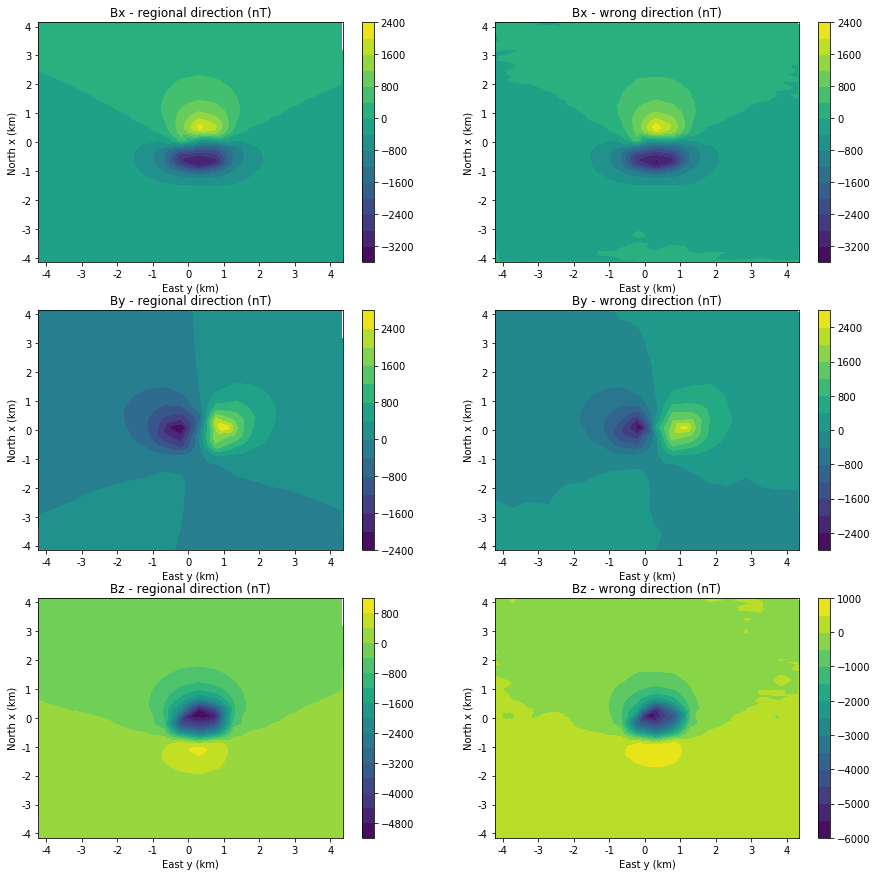

In [451]:
mpl.figure(figsize=(15,15))


mpl.subplot(3,2,1)

mpl.title("Bx - regional direction (nT)")
mpl.tricontourf(yp, xp, data['bx'], 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,2)

mpl.title("Bx - wrong direction (nT)")
mpl.tricontourf(yp, xp, Bx_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,3)

mpl.title("By - regional direction (nT)")
mpl.tricontourf(yp, xp, data['by'], 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,4)

mpl.title("By - wrong direction (nT)")
mpl.tricontourf(yp, xp, By_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,5)

mpl.title("Bz - regional direction (nT)")
mpl.tricontourf(yp, xp, data['bz'], 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,6)

mpl.title("Bz - wrong direction (nT)")
mpl.tricontourf(yp, xp, Bz_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.show()

In [469]:
A_btb = mfun.sm_btb_sphere(xp, yp, zp, xp, yp, h,
                           model['inc'], model['dec'])

In [470]:
vp_btb = np.sqrt(vp*vp)

In [471]:
np.allclose(vp,vp_btb)

False

In [472]:
btb = np.dot(A_btb,vp)

In [473]:
BTB_layer_fd = np.sqrt(Bx_layer_fd**2 + By_layer_fd**2 + Bz_layer_fd**2)

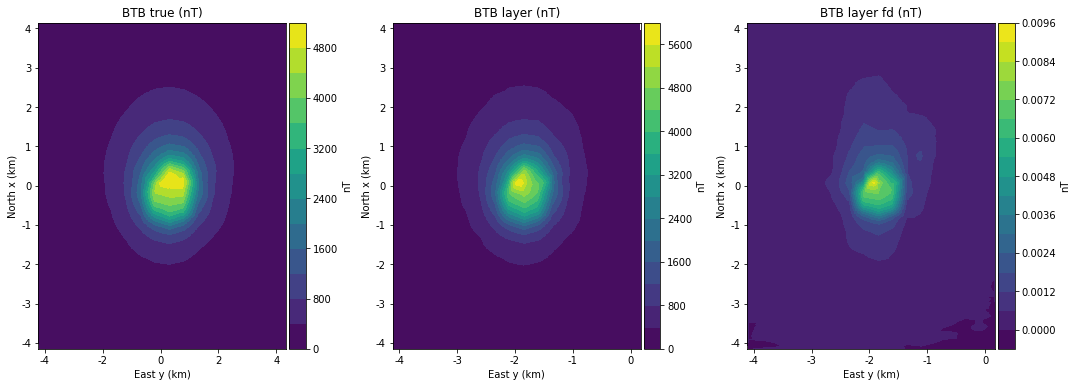

In [474]:
mpl.figure(figsize=(18,6))

mpl.subplot(1,3,1)
mpl.title("BTB true (nT)")

mpl.tricontourf(yp, xp, data['amf'], 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar(pad=0.01, aspect=20, shrink=1).set_label('nT')
mpl.m2km()

mpl.subplot(1,3,2)
mpl.title("BTB layer (nT)")

mpl.tricontourf(yp, xp, BTB_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.m2km()
mpl.colorbar(pad=0.01, aspect=20, shrink=1).set_label('nT')

mpl.subplot(1,3,3)
mpl.title("BTB layer fd (nT)")

mpl.tricontourf(yp, xp, btb, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.m2km()
mpl.colorbar(pad=0.01, aspect=20, shrink=1).set_label('nT')

mpl.show()

In [483]:
A_bx_wd = mfun.sm_bx_sphere(xp, yp, zp, xp, yp, h,
                            70., 53.)
                        #data['main_field'][0], data['main_field'][1])

Bx_layer_wd = np.dot(A_bx,vp)

In [484]:
np.allclose(data['bx'],Bx_layer_fd)

False

In [485]:
A_by_wd = mfun.sm_by_sphere(xp, yp, zp, xp, yp, h,
                            70., 53.)
                        #data['main_field'][0], data['main_field'][1])

By_layer_wd = np.dot(A_by,vp)

In [486]:
np.allclose(data['by'],By_layer_fd)

False

In [487]:
A_bz_wd = mfun.sm_bz_sphere(xp, yp, zp, xp, yp, h,
                            70., 53.)
                        #data['main_field'][0], data['main_field'][1])

Bz_layer_wd = np.dot(A_bz,vp)

In [488]:
np.allclose(data['bz'],Bz_layer_fd)

False

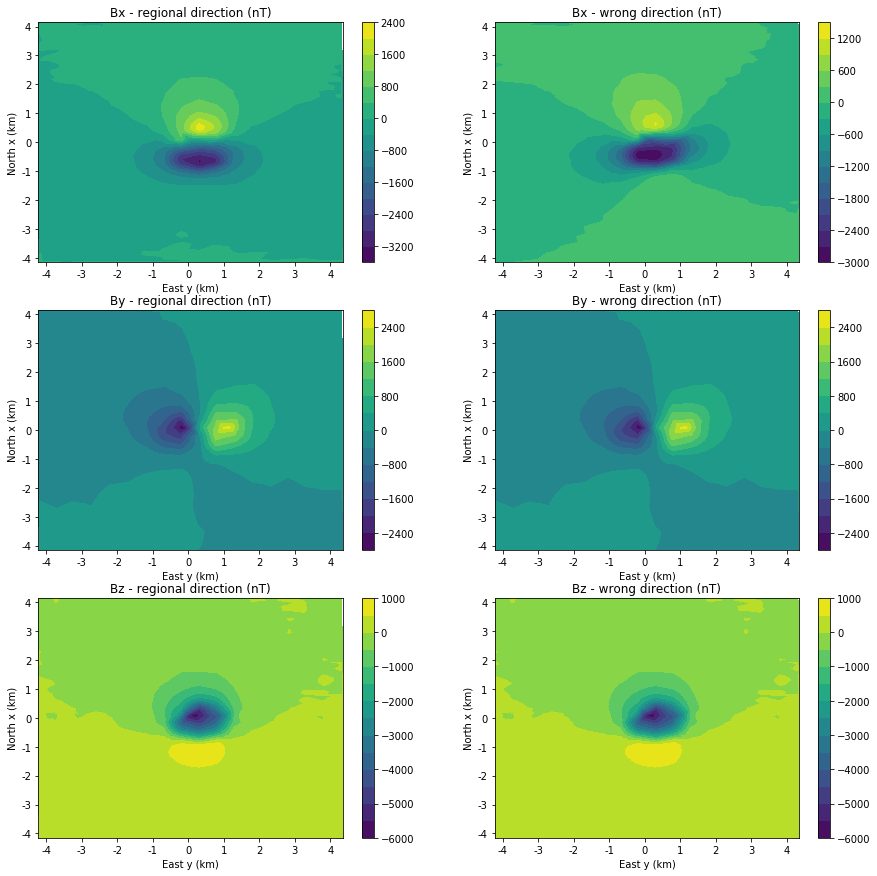

In [489]:
mpl.figure(figsize=(15,15))


mpl.subplot(3,2,1)

mpl.title("Bx - regional direction (nT)")
mpl.tricontourf(yp, xp, Bx_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,2)

mpl.title("Bx - wrong direction (nT)")
mpl.tricontourf(yp, xp, Bx_layer_wd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,3)

mpl.title("By - regional direction (nT)")
mpl.tricontourf(yp, xp, By_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,4)

mpl.title("By - wrong direction (nT)")
mpl.tricontourf(yp, xp, By_layer_wd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,5)

mpl.title("Bz - regional direction (nT)")
mpl.tricontourf(yp, xp, Bz_layer_fd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.subplot(3,2,6)

mpl.title("Bz - wrong direction (nT)")
mpl.tricontourf(yp, xp, Bz_layer_wd, 15)
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.colorbar()
mpl.m2km()

mpl.show()